In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
#path = "/content/drive/MyDrive/VIX /loan_data_2007_2014.csv"
df1 = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_14032\671764292.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('loan_data_2007_2014.csv')


# Exploratory Data Analysis

In [3]:
pd.set_option('display.max_columns', None)
df1.sample(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
402036,402036,10597780,12529767,10000,10000,10000.0,36 months,15.61,349.65,C,C5,Customer Service,10+ years,RENT,40000.0,Source Verified,Apr-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,895xx,NV,23.49,0.0,Mar-04,0.0,37.0,NaN,6.0,0.0,23725,84.7,18.0,w,0.0,0.0,12031.61,12031.61,10000.00,2031.61,0.0,0.0,0.0,Dec-15,5388.26,NaN,Jan-16,0.0,37.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,36900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28000.0,NaN,NaN,NaN
7448,7448,881888,1097041,2000,2000,2000.0,36 months,9.91,64.45,B,B1,NaN,NaN,RENT,25000.0,Verified,Sep-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,moving,Blessed indeed!,117xx,NY,19.92,1.0,Mar-82,0.0,23.0,NaN,11.0,0.0,10655,28.7,28.0,f,0.0,0.0,1413.50,1413.50,1147.64,265.86,0.0,0.0,0.0,Aug-13,64.45,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 


*   dataset memiliki 75 kolom dan 466285 baris.
*   terdapat 17 kolom yang tidak memiliki data sama sekali sehingga dilakukan penghapusan kolom tersebut.
*   terdapat 5 kolom yang memiliki missing value paling banyak sehingga dapat dilakukan penghapusan kolom tersebut.
*   belum terdapat spesifik kolom target sehingga perlu dilakukan feature engineering untuk membuat kolom target yang spesifik.









In [33]:
object_columns = df1.select_dtypes(include='object')
object_columns.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [34]:
numerical_df = df1.select_dtypes(include=['float', 'int64'])
numerical_df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [35]:
num = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
cat = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type']


Jumlah kolom kategori numerical

In [36]:
len(df1[num].columns)

30

Jumlah kolom kategori categorical

In [37]:
len(df1[cat].columns)

20

In [38]:
df1[num].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,0.0,NaN,NaN,NaN


In [39]:
df1[cat].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL




*   Memisahkan kolom berdasarkan tipe data yaitu numerical dan categorical sehingga lebih mudah dalam menganalisa.
*   pada kategori num, nilai sudah sesuai dengan nama kolom.
*   pada kategori cat, nilai sudah sesuai dengan nama kolom.






In [40]:
df1[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
open_acc,466256.0,11.187069,4.987526,0.00,8.000000,10.000000,14.00000,8.400000e+01



*   pada kolom last_pymnt_amnt, tot_coll_amt, tot_cur_bal, total_rev_hi_lim
 memiliki nilai mean-median terlalu jauh sehingga dapat diperkirakan terdapat outlier pada kolom tersebut.





*   pada kolom emp_title, issue_d, title, zip_code, last_pymnt_d,last_credit_pull_d, url memiliki nilai unique yang lebih banyak sehingga perlu dilakukan pemrosesan. 





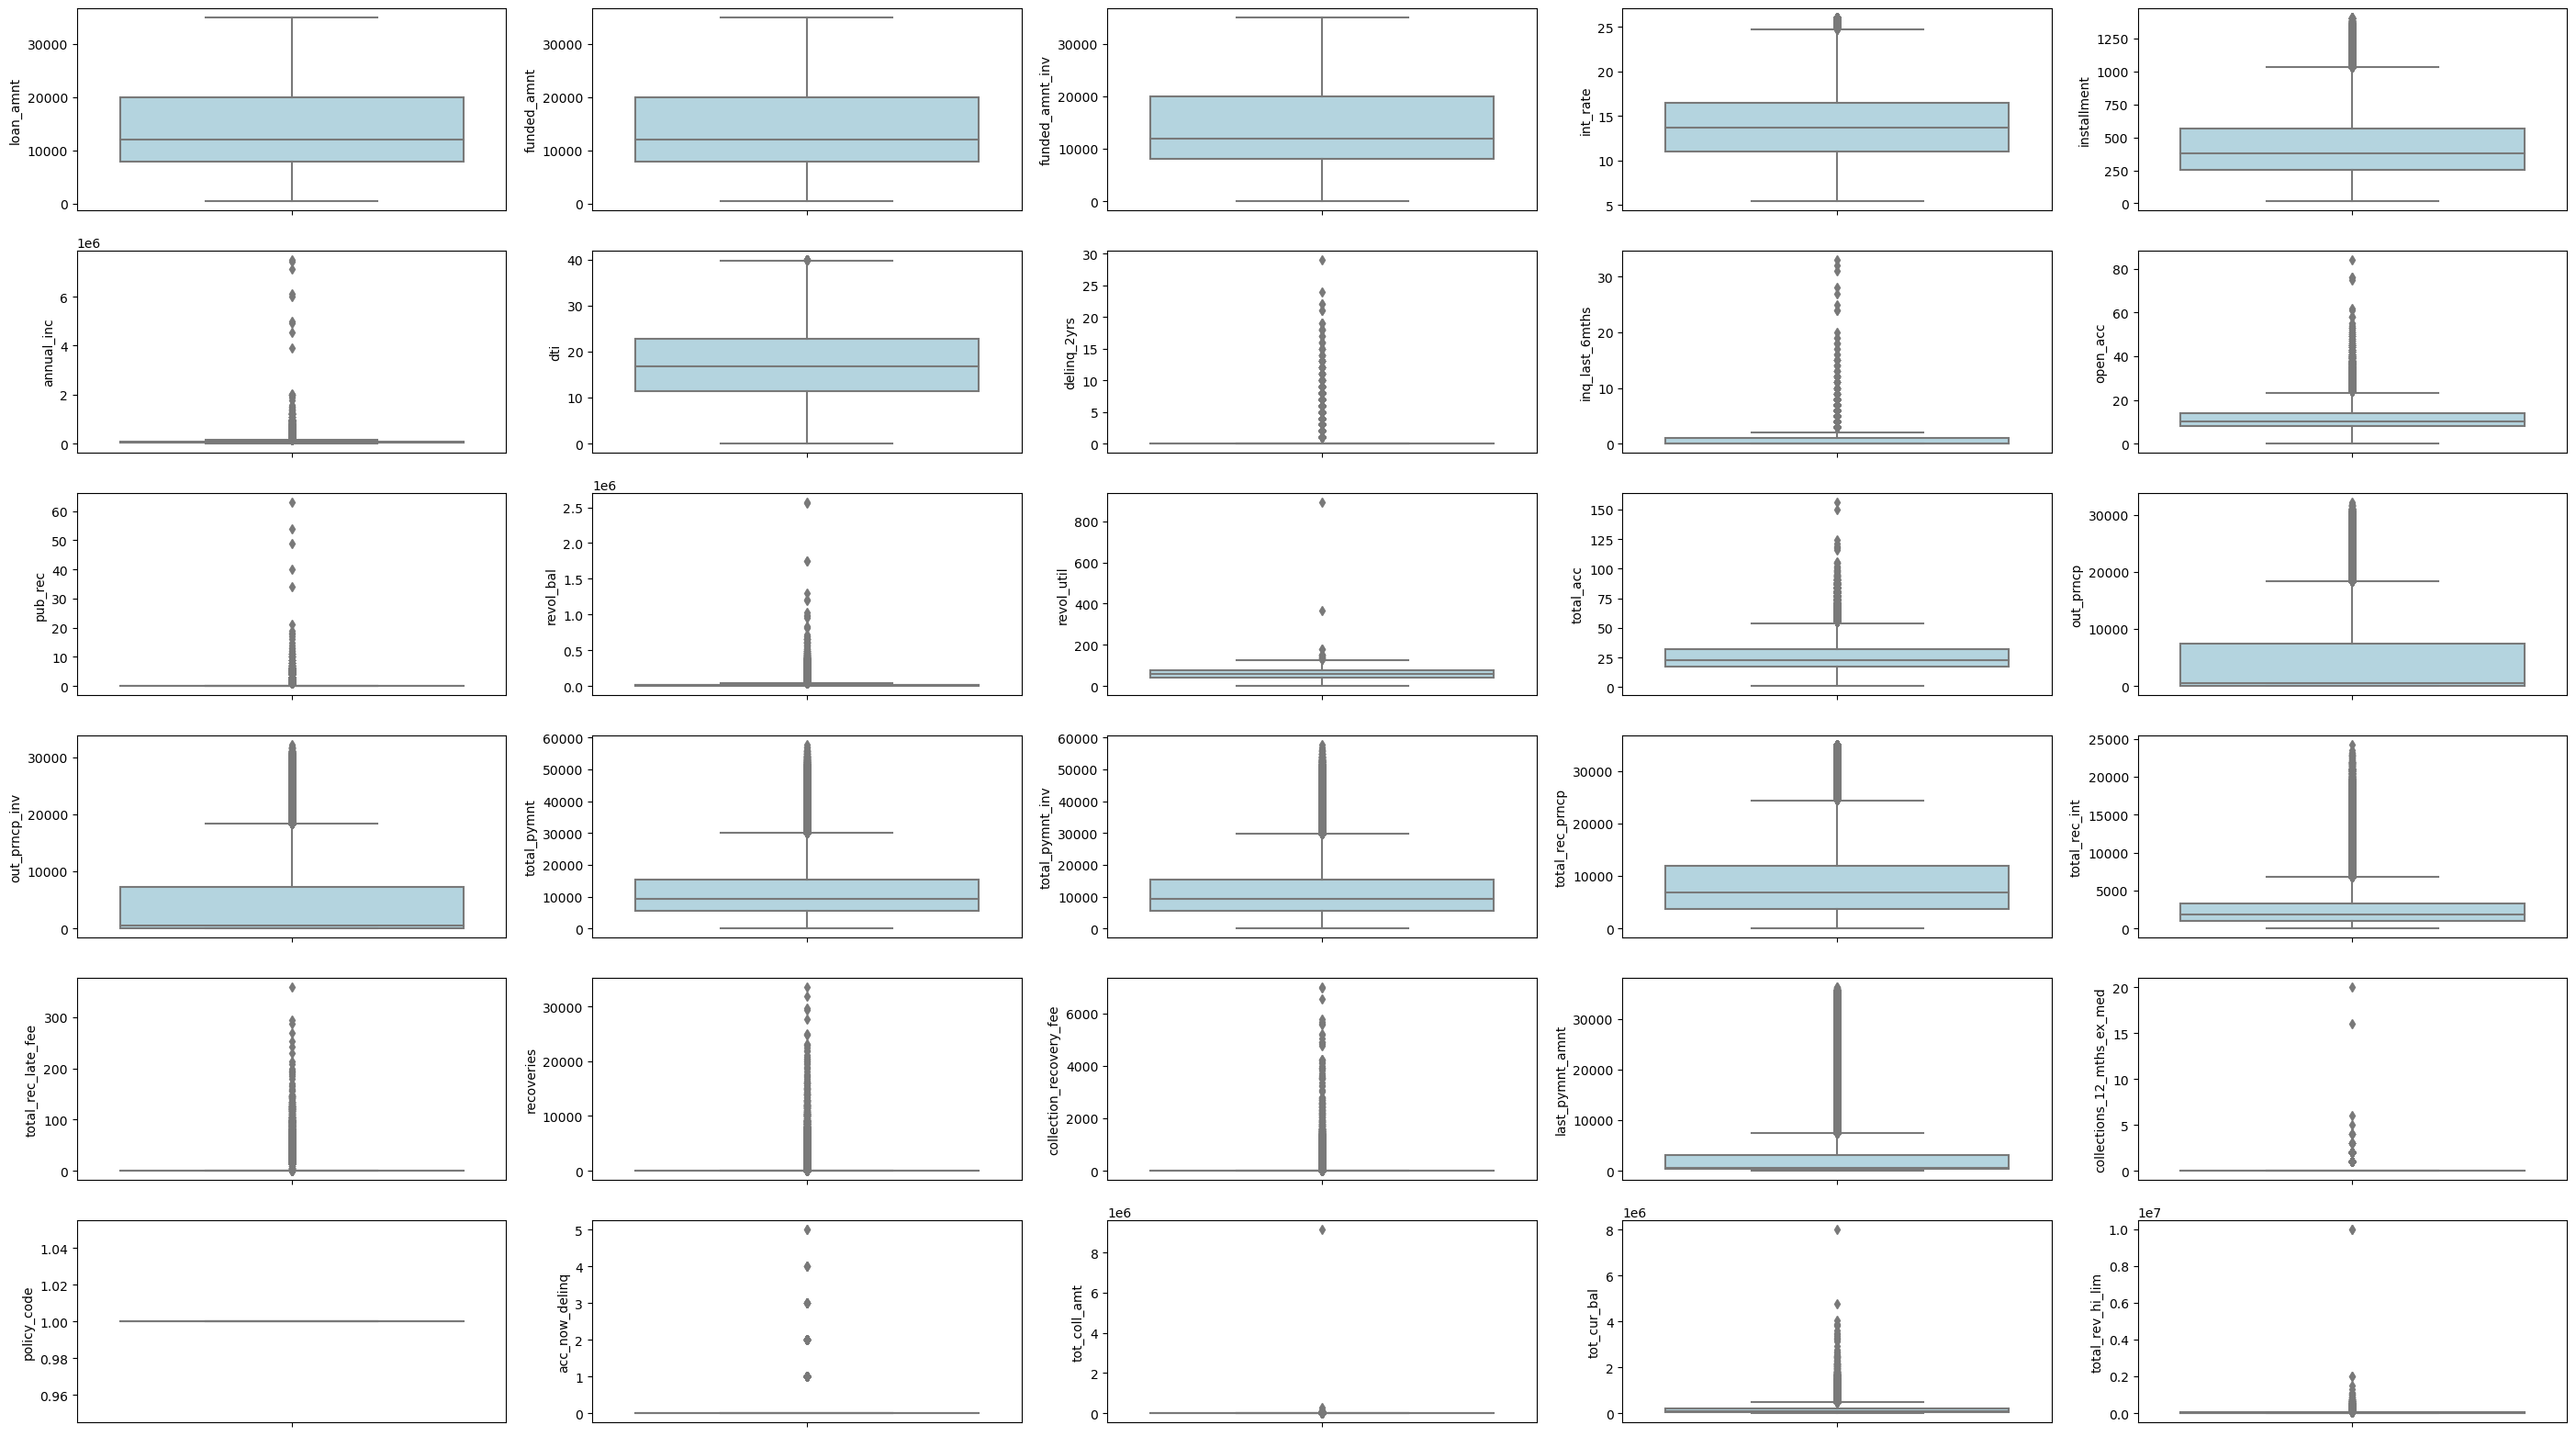

In [41]:
fig, ax = plt.subplots(6, 5, figsize=(35, 20))
for i in range(0, len(num)):
  try:
    plt.subplot(6,5, i+1)
  except ValueError:
    break
  sns.boxplot(y=df1[num[i]], color='lightblue', orient='v')

Berdasarkan grafik boxplot di atas, kolom yang tidak memiliki outlier dan berdistribusi normal hanya kolom loan_amnt, funded_amnt, funded_amnt_inv

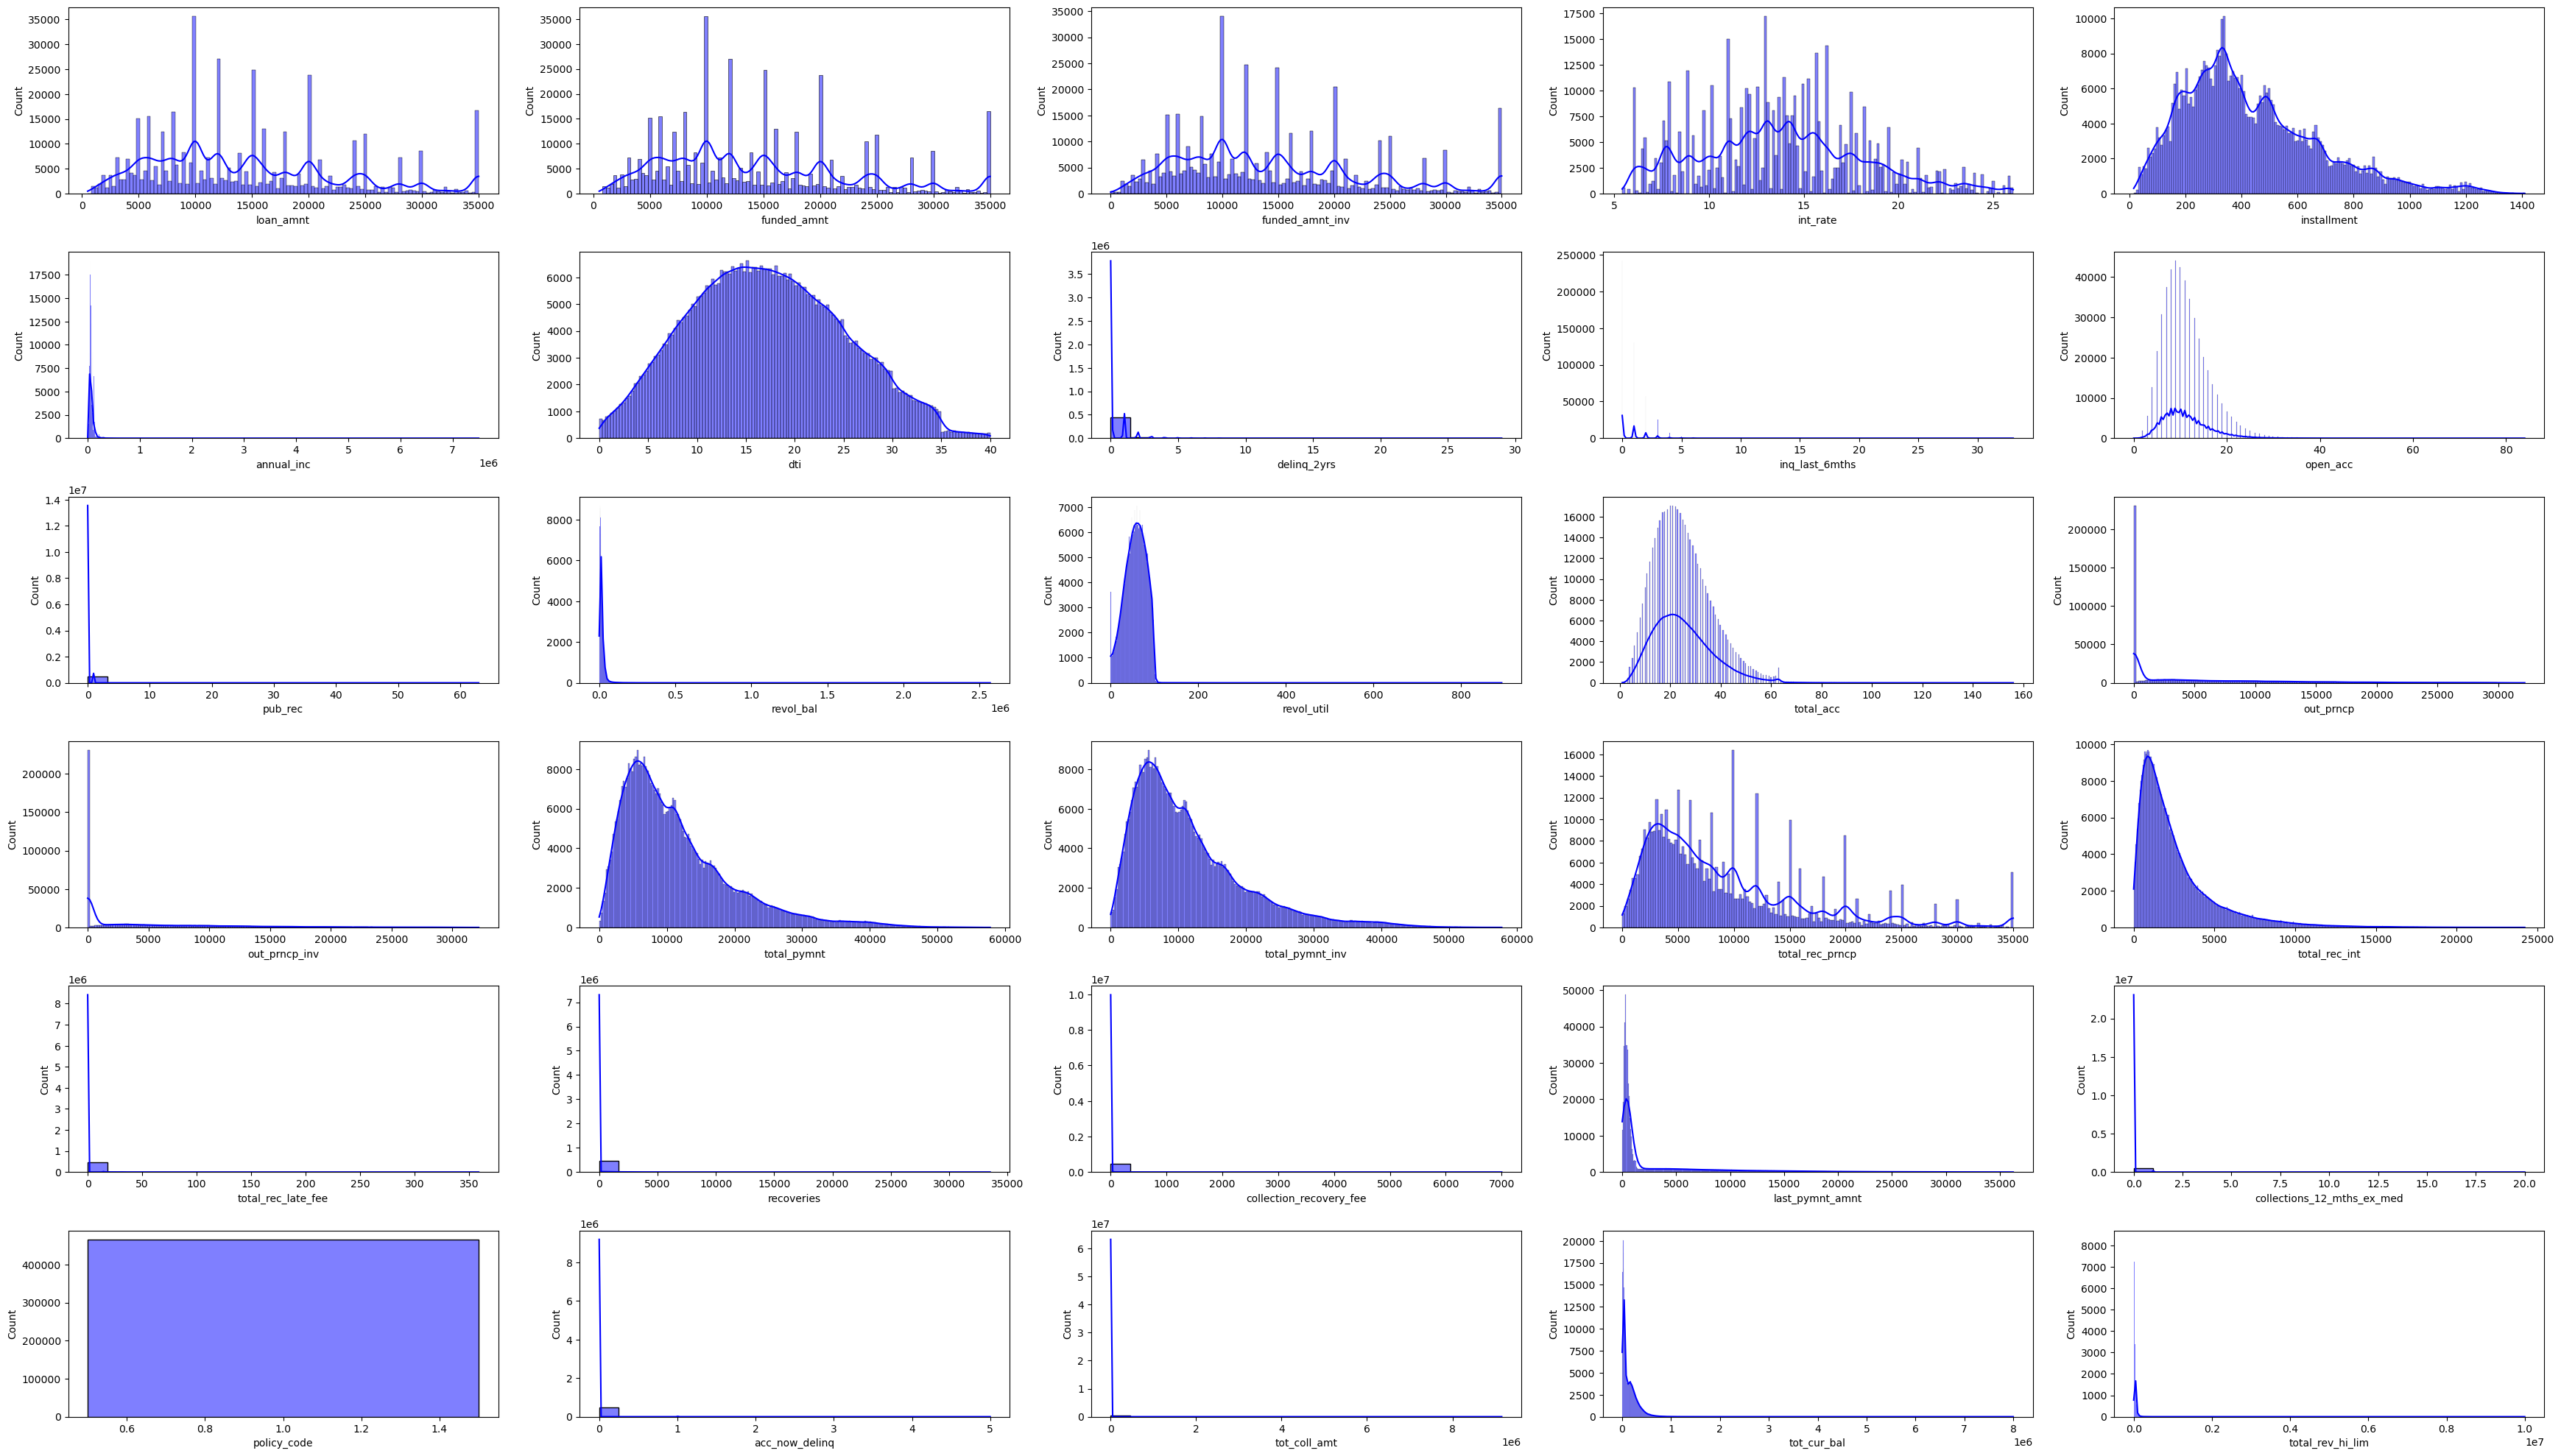

In [42]:
plt.figure(figsize=(35, 20))
for i in range(0, len(num)):
    plt.subplot(6, 5, i+1)
    sns.histplot(df1[num[i]], color='blue', kde=True)
    plt.tight_layout(pad = 1.5)

Berdasarkan grafik di atas, distribusi kolom pada kolom kategori numerical rata-rata skew kiri.

Value Count Tiap Kolom Tipe Categorical:

In [43]:
for col in cat:
  print(f'''Value Count Kolom {col}:''')
  print(df1[col].value_counts())
  print()

Value Count Kolom term:
 36 months    337953
 60 months    128332
Name: term, dtype: int64

Value Count Kolom grade:
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

Value Count Kolom sub_grade:
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

Value Count Kolom emp_title:
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern

In [44]:
df1[cat].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276



*   Terdapat beberapa kolom dengan unique value yang terlalu banyak. 
*   Terdapat beberapa kolom dengan distribusi nilai terlalu timpang sehingga ketika akan melakukan modeling dapat dikecualikan dalam feature selection.




In [45]:
cat2 = ['term', 'grade', 'sub_grade', 'emp_length','home_ownership', 'verification_status', 'loan_status', 
 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

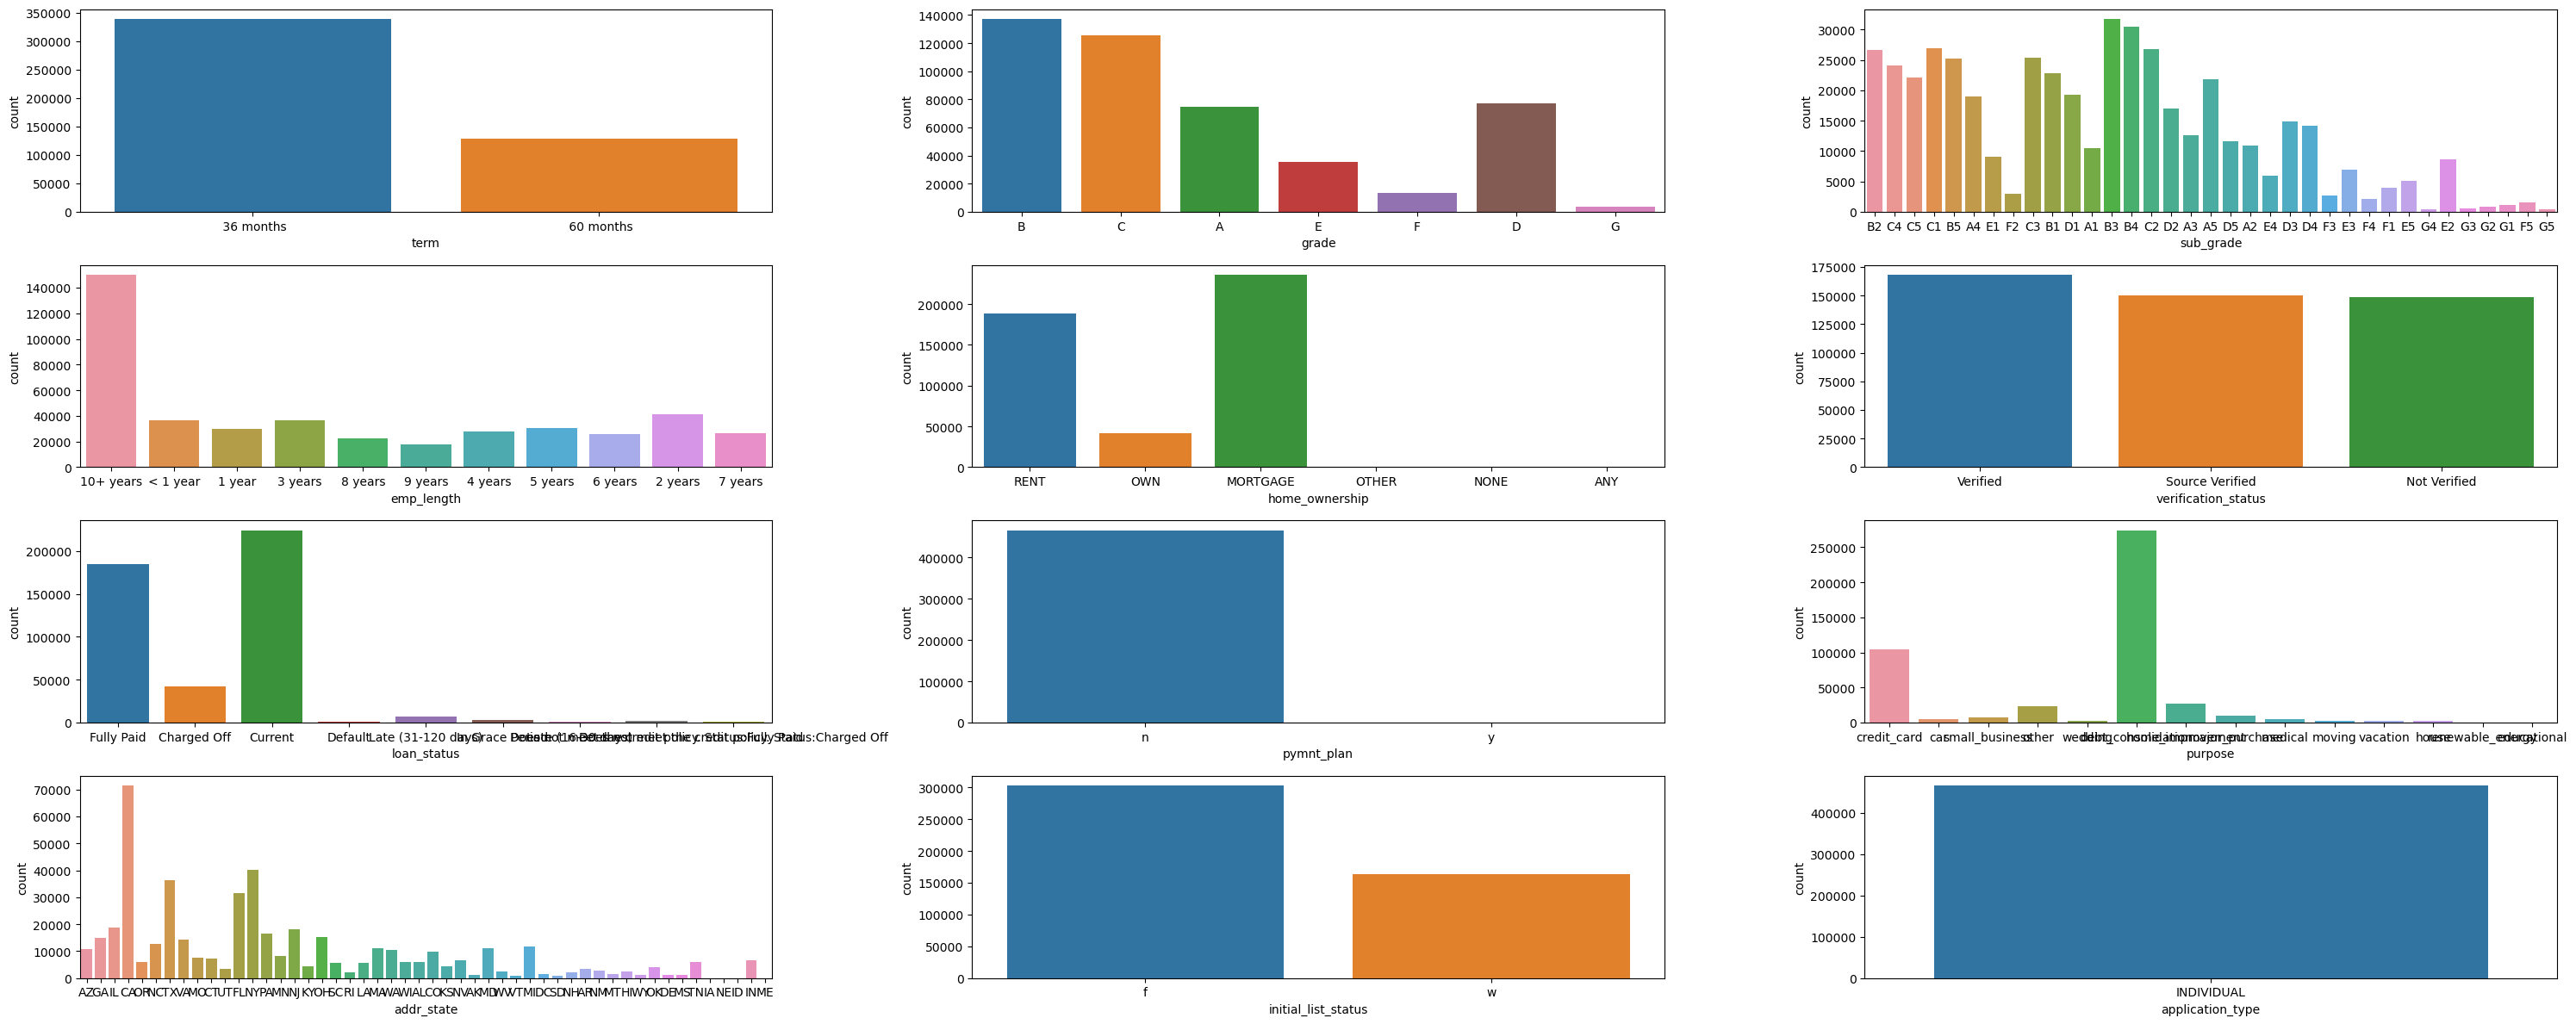

In [46]:
fig,ax = plt.subplots(4,3,figsize=(30,12))
for col,subplot in zip(cat2, ax.flatten()):
  sns.countplot(x = df1[col], ax=subplot)
  fig.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'Default'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'In Grace Period'),
  Text(6, 0, 'Late (16-30 days)'),
  Text(7, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(8, 0, 'Does not meet the credit policy. Status:Charged Off')])

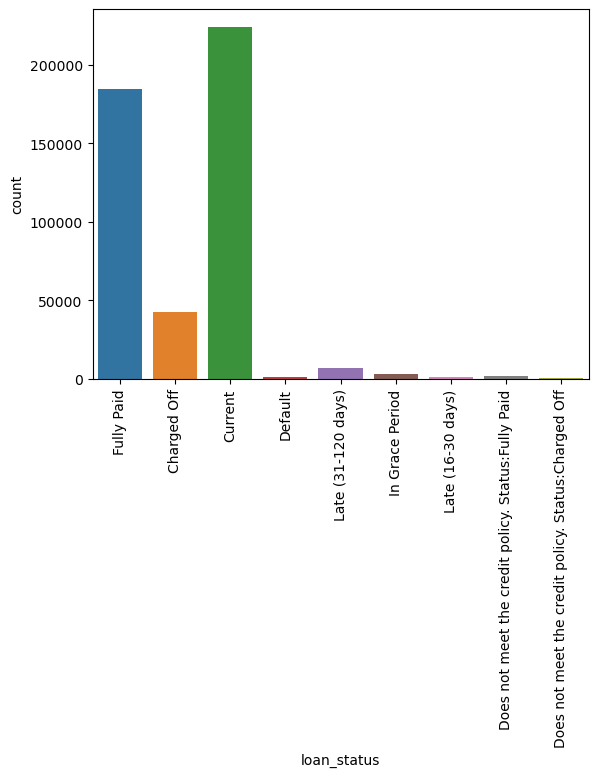

In [47]:
sns.countplot(x = df1['loan_status'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

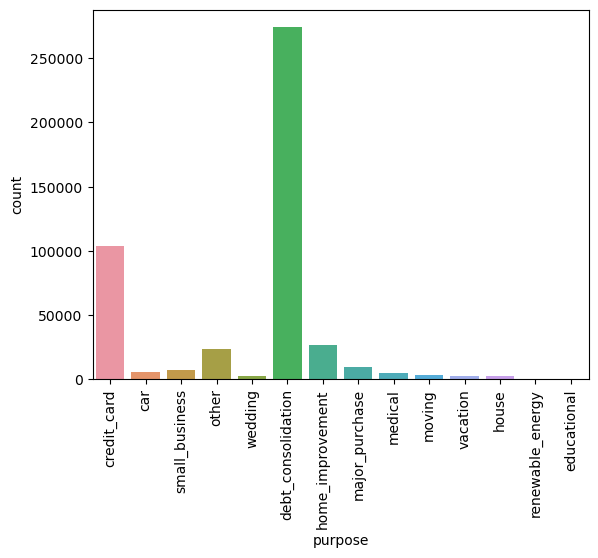

In [48]:
sns.countplot(x = df1['purpose'])
plt.xticks(rotation=90)

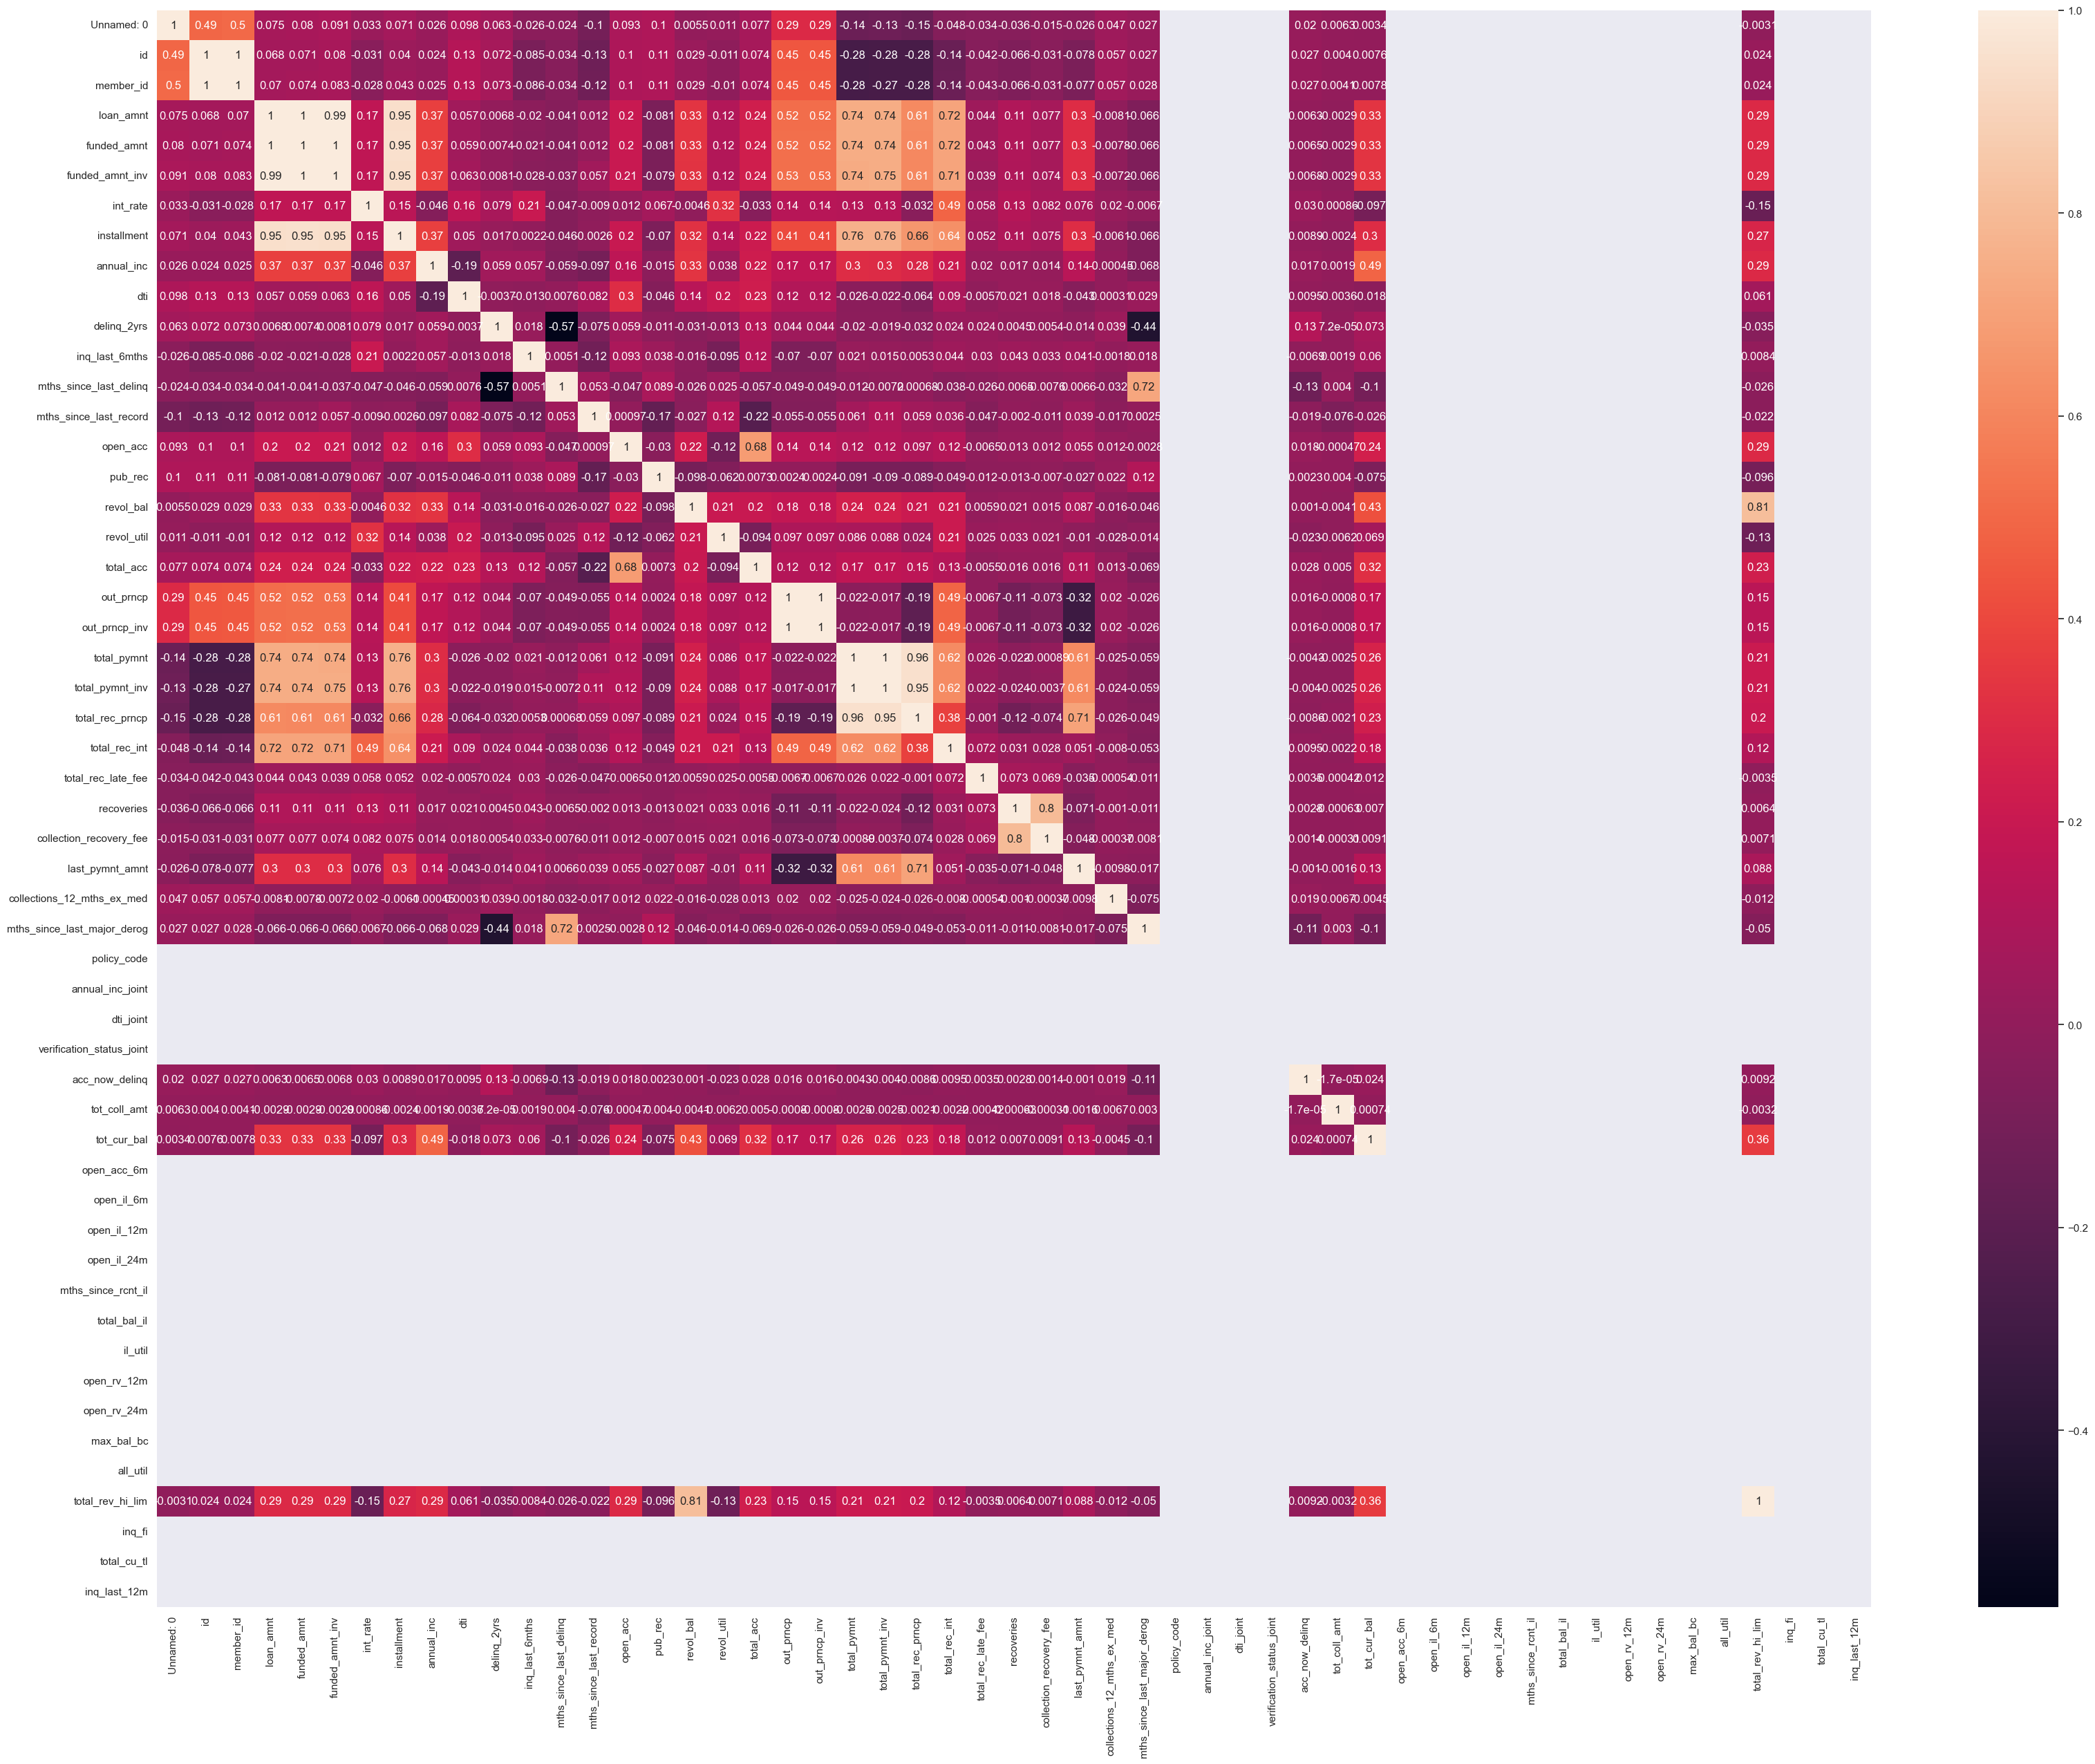

In [49]:
sns.set(rc={'figure.figsize':(40,30)})
corr = df1.corr()
sns.heatmap(corr,annot=True)
plt.show()

terdapat kolom yang berkorelasi kuat yaitu:
*   loan_amnt dengan funded_amnt_inv dengan korelasi positif 0.99
*   loan_amnt dengan installment dengan korelasi positif 0.95
*   funded_amnt dengan funded_amnt_inv dengan korelasi positif 1
*   funded_amnt dengan installment dengan korelasi positif 0.95
*   total_pymnt dengan total_rec_prncp dengan korelasi postif 0.96
*   total_pymnt dengan total_pymnt_inv dengan korelasi postif 1
*   total_pymnt_inv dengan total_rec_prncp dengan korelasi postif 0.95
*   recoveries dengan collection_recovery_fee dengan korelasi positif 0.8 
*   revol_bal dengan total_rev_hi_lim dengan korelasi positif 0.81

sehingga kolom-kolom tersebut kemungkinan mengalami redundan.











# Data Pre-Processing

## Drop Data

In [4]:
column_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'

   # expert judgment
    , 'sub_grade']
df1 = df1.drop(column_drop, axis=1)

### Feature earliest_cr_line

In [5]:
df1['earliest_cr_line_date'] = pd.to_datetime(df1['earliest_cr_line'], format='%b-%y')
df1['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [6]:
df1['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df1['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df1['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [7]:
df1['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [8]:
df1[df1['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


In [9]:
df1.loc[df1['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df1['mths_since_earliest_cr_line'].max()
df1.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### Feature issue_d

In [10]:
df1['issue_d_date'] = pd.to_datetime(df1['issue_d'], format='%b-%y')
df1['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df1['issue_d_date']) / np.timedelta64(1, 'M')))

In [11]:
df1['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [12]:
df1.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### Feature last_pymnt_d

In [13]:
df1['last_pymnt_d_date'] = pd.to_datetime(df1['last_pymnt_d'], format='%b-%y')
df1['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df1['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [14]:
df1['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [15]:
df1.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### Feature next_pymnt_d

In [16]:
df1['next_pymnt_d_date'] = pd.to_datetime(df1['next_pymnt_d'], format='%b-%y')

In [17]:
df1['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df1['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [18]:
df1['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [19]:
df1.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### Feature last_credit_pull_d

In [20]:
df1['last_credit_pull_d_date'] = pd.to_datetime(df1['last_credit_pull_d'], format='%b-%y')
df1['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df1['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [21]:
df1['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [22]:
df1.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

### Drop data with correlation > 0.7

In [23]:
corr_matrix = df1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_14032\3570467857.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [24]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [25]:
df1.drop(to_drop_hicorr, axis=1, inplace=True)

## Missing Value



1.   Menghapus kolom yang tidak memiliki nilai
2.   Menghapus kolom yang memiliki missing value terbanyak



In [26]:
df1.isnull().sum()

Unnamed: 0                          0
loan_amnt                           0
term                                0
int_rate                            0
grade                               0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
pymnt_plan                          0
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list

In [27]:
# menghapus kolom dengan yang tidak memiliki value
columns = ['zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m']
df1.drop(columns, inplace=True, axis=1)

In [28]:
# menghapus kolom dengan missing value paling banyak 
columns = ['mths_since_last_delinq', 'mths_since_last_record', 'tot_coll_amt', 'tot_cur_bal'                 
           ]
df1.drop(columns, inplace=True, axis=1)

In [29]:
df2 = df1

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   term                         466285 non-null  object 
 3   int_rate                     466285 non-null  float64
 4   grade                        466285 non-null  object 
 5   emp_title                    438697 non-null  object 
 6   emp_length                   445277 non-null  object 
 7   home_ownership               466285 non-null  object 
 8   annual_inc                   466281 non-null  float64
 9   verification_status          466285 non-null  object 
 10  loan_status                  466285 non-null  object 
 11  pymnt_plan                   466285 non-null  object 
 12  purpose                      466285 non-null  object 
 13 

In [31]:
df2.isna().sum()

Unnamed: 0                         0
loan_amnt                          0
term                               0
int_rate                           0
grade                              0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                             20
addr_state                         0
dti                                0
delinq_2yrs                       29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       340
total_acc                         29
initial_list_status                0
out_prncp                          0
total_rec_late_fee                 0
recoveries                         0
c

In [32]:
df2['emp_title'].fillna(df2['emp_title'].mode()[0], inplace = True)
df2['emp_length'].fillna(df2['emp_length'].mode()[0], inplace = True)
df2['annual_inc'].fillna(df2['annual_inc'].median(), inplace = True)
df2['delinq_2yrs'].fillna(df2['delinq_2yrs'].median(), inplace = True)
df2['inq_last_6mths'].fillna(df2['inq_last_6mths'].median(), inplace = True)
df2['open_acc'].fillna(df2['open_acc'].median(), inplace = True)
df2['pub_rec'].fillna(df2['pub_rec'].median(), inplace = True)
df2['revol_util'].fillna(df2['revol_util'].median(), inplace = True)
df2['total_acc'].fillna(df2['total_acc'].median(), inplace = True)
df2['collections_12_mths_ex_med'].fillna(df2['collections_12_mths_ex_med'].median(), inplace = True)
df2['acc_now_delinq'].fillna(df2['acc_now_delinq'].median(), inplace = True)
df2['title'].fillna(df2['title'].mode()[0], inplace = True)



Mengisi missing value, untuk kolom dengan data type float/int diisi dengan median, sedangkan kolom dengan data type object diisi dengan mode

   



In [33]:
df2.isna().sum()

Unnamed: 0                      0
loan_amnt                       0
term                            0
int_rate                        0
grade                           0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                           0
addr_state                      0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
initial_list_status             0
out_prncp                       0
total_rec_late_fee              0
recoveries                      0
collections_12_mths_ex_med      0
policy_code                     0
application_ty

In [34]:
df2['mths_since_earliest_cr_line'].fillna(df2['mths_since_earliest_cr_line'].median(), inplace = True)

## Duplicated Data

In [35]:
df2.duplicated().sum()

0

## Outlier

In [36]:
nums = ['loan_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'mths_since_earliest_cr_line', 'mths_since_issue_d' 
      ]


In [37]:
numerical_df = df2.select_dtypes(include=['float', 'int64'])
numerical_df.columns

Index(['Unnamed: 0', 'loan_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'mths_since_earliest_cr_line', 'mths_since_issue_d'],
      dtype='object')

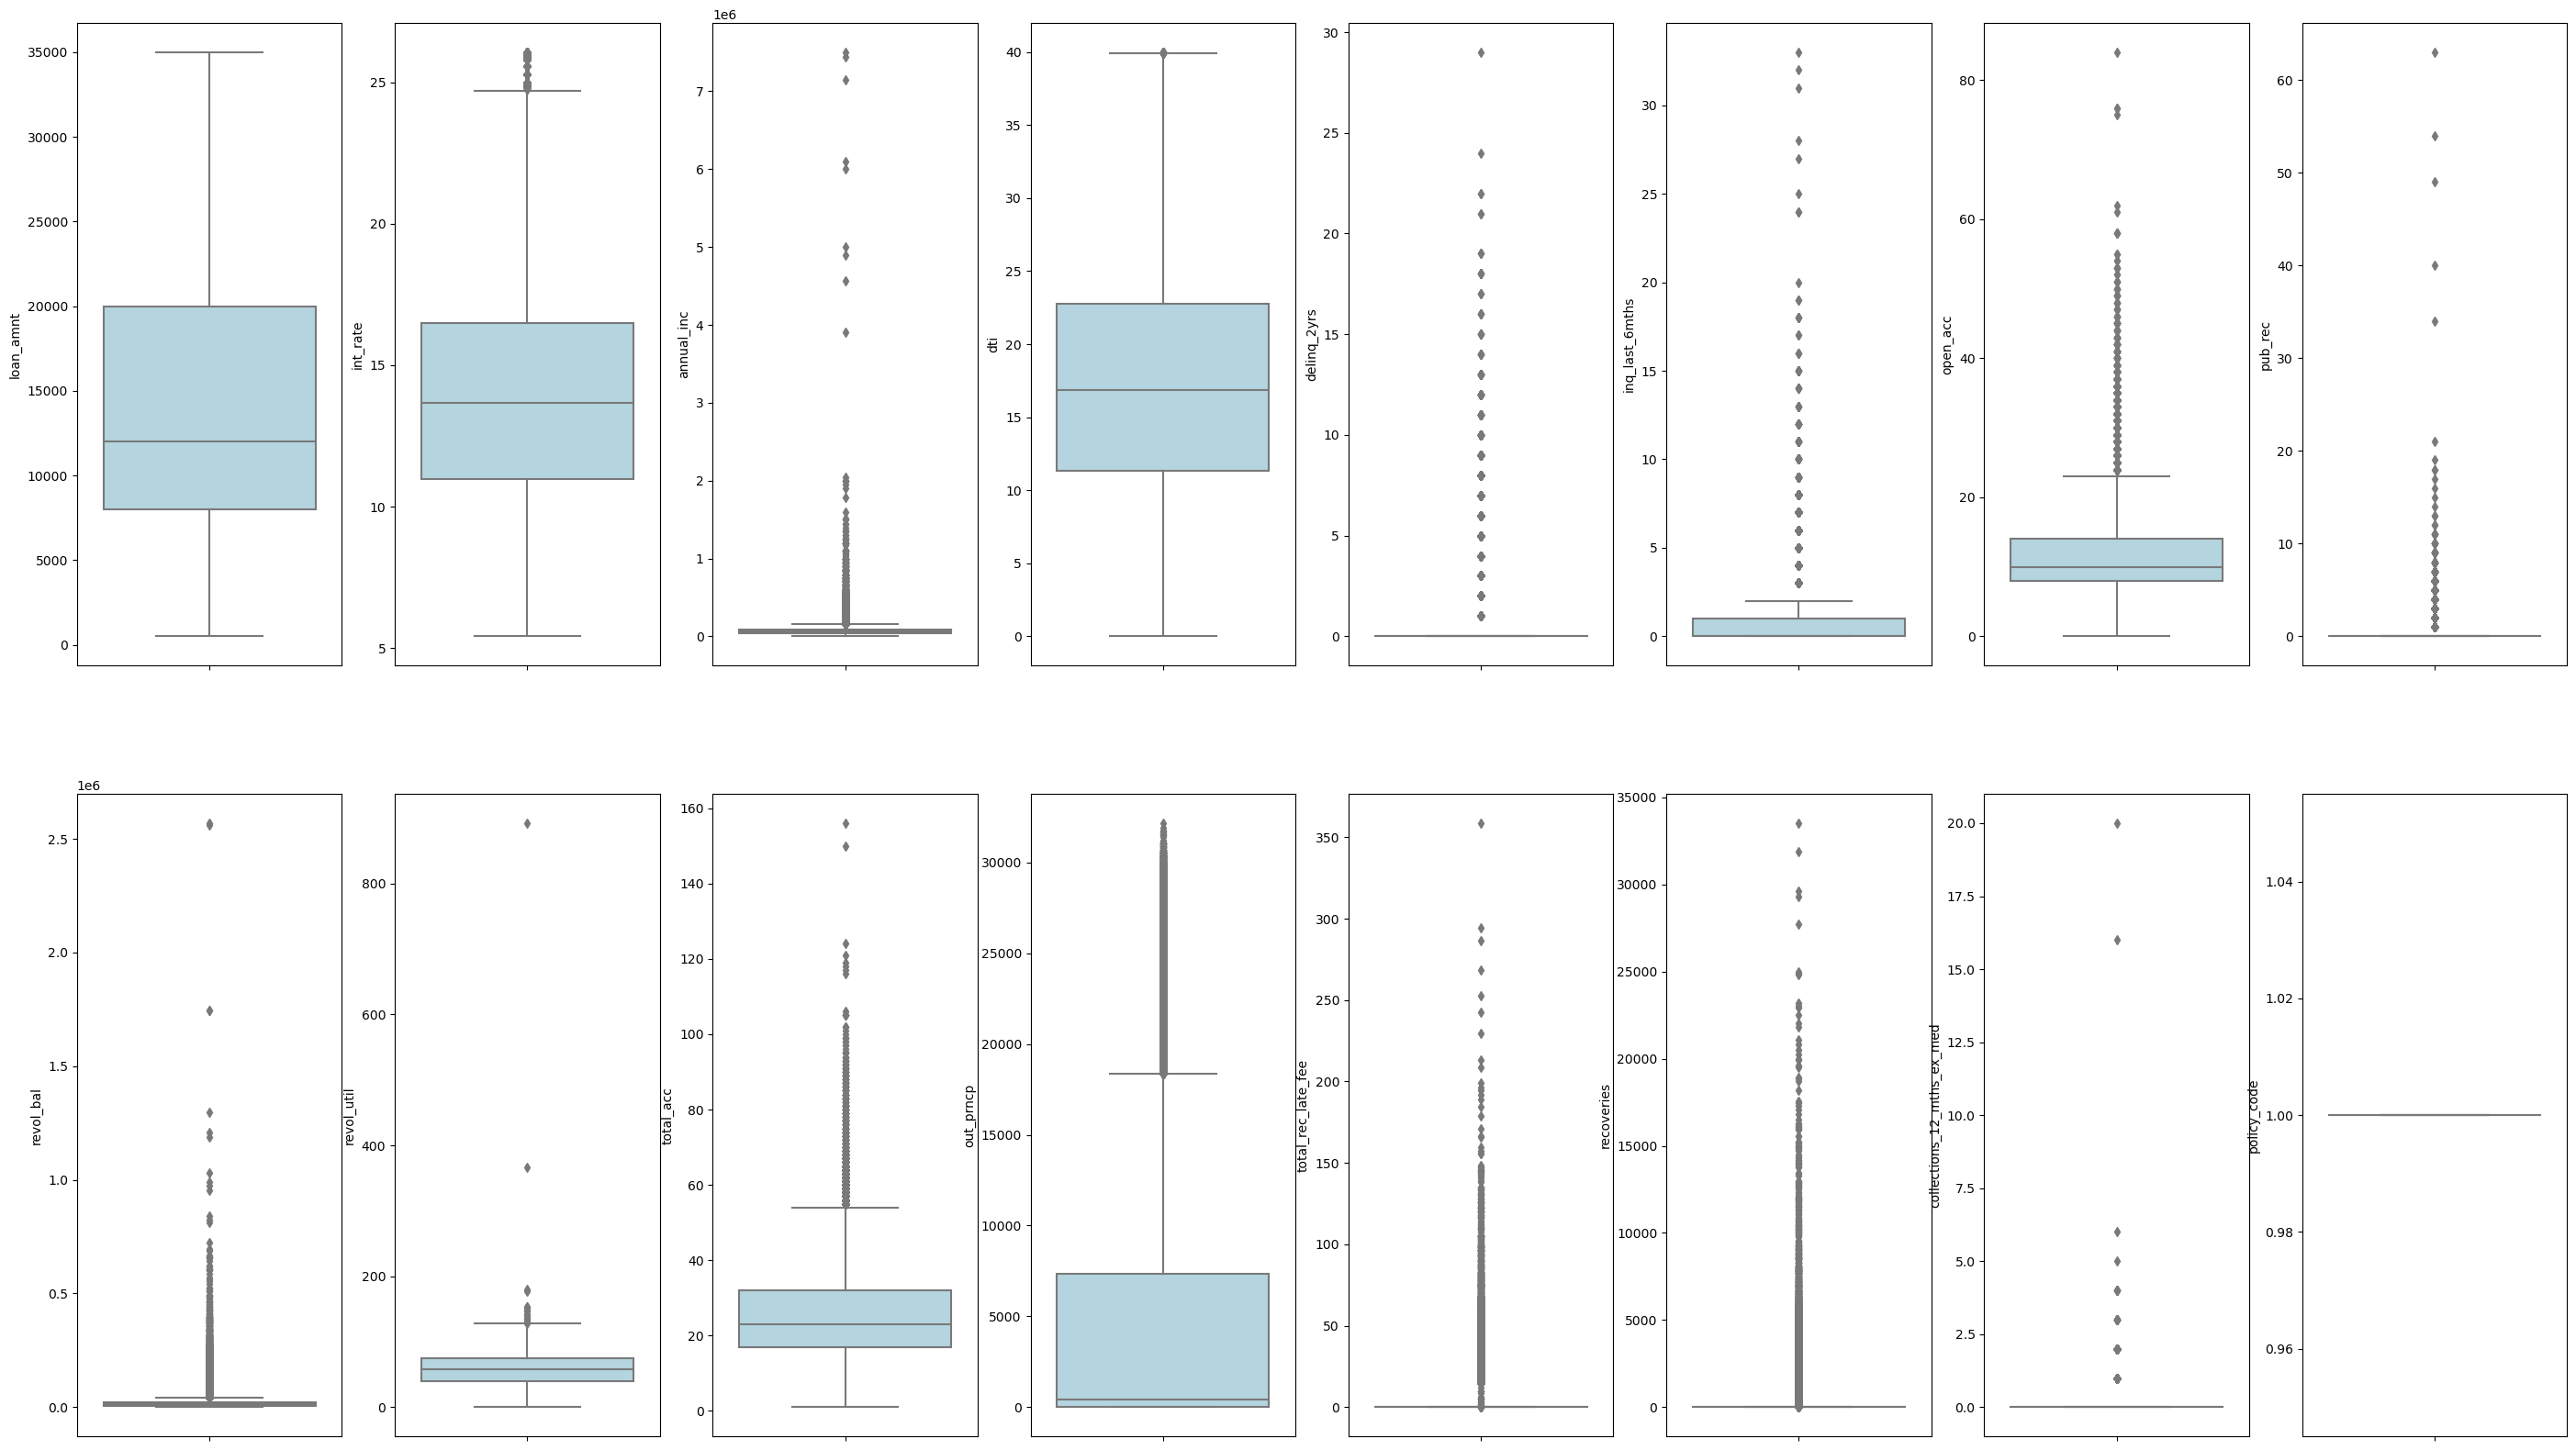

In [38]:
fig, ax = plt.subplots(2, 8, figsize=(35, 20))
for i in range(0, len(nums)):
  try:
    plt.subplot(2,8, i+1)
  except ValueError:
    break
  sns.boxplot(y=df2[nums[i]], color='lightblue', orient='v')

In [39]:
from scipy import stats

In [40]:
# Handling with zscore
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

filtered_entries = np.array([True] * len(df2))

for col in ['int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'mths_since_earliest_cr_line', 'mths_since_issue_d' ]:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 466285
Jumlah baris setelah memfilter outlier: 457346


## Feature Encoding

In [41]:
categorical_df = df2.select_dtypes(include=['object'])
categorical_df.columns

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')

In [42]:
cats = ['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'initial_list_status', 'application_type']

In [43]:
for col in cats:
  print(f'''Value Count Kolom {col}:''')
  print(df2[col].value_counts())
  print()

Value Count Kolom term:
 36 months    329014
 60 months    128332
Name: term, dtype: int64

Value Count Kolom grade:
B    134584
C    123072
D     75449
A     73132
E     35020
F     12947
G      3142
Name: grade, dtype: int64

Value Count Kolom emp_title:
Teacher                             32460
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                    ...  
Ocean                                   1
Okaloosa County Sheriff's Office        1
VHC                                     1
jj trucking                             1
Server Engineer Lead                    1
Name: emp_title, Length: 200515, dtype: int64

Value Count Kolom emp_length:
10+ years    169592
2 years       40202
3 years       35746
< 1 year      34553
5 years       30232
1 year        28411
4 years       27342
7 years       25861
6 years       25713
8 years       22082
9 ye

In [44]:
column_drop1 = [
    'emp_title',
    'title',
    'application_type',
    'pymnt_plan'
    ]
df2.drop(column_drop1, inplace=True, axis=1)

C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_14032\2877316152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(column_drop1, inplace=True, axis=1)


In [45]:
df2.isnull().sum()

Unnamed: 0                     0
loan_amnt                      0
term                           0
int_rate                       0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
policy_code                    0
acc_now_delinq                 0
mths_since_earliest_cr_line    0
mths_since_issue_d             0
dtype: int64

In [46]:
#mapping_term= {
   # '36 months' : 36,
    #'60 months' : 60
#}

mapping_initial_list_status = {
    'f' : 0,
    'w' : 1
}

mapping_emp_length = {
    '10+ years' : 10,    
    '2 years'   : 2,      
    '3 years'   : 3,     
    '< 1 year'  : 0,   
    '5 years'   : 5,   
    '1 year'    : 1,  
    '4 years'   : 4,   
    '7 years'   : 7,   
    '6 years'   : 6,   
    '8 years'   : 8,   
    '9 years'   : 9,   
}

mapping_verification_status = {
    'Verified' : 0,
    'Source Verified' : 1,
    'Not Verified' : 2
}

mapping_loan_status = {
    'Current'                                                : 0,
    'Fully Paid'                                             : 1,
    'Charged Off'                                            : 8,
    'Late (31-120 days)'                                     : 5,
    'In Grace Period'                                        : 3,
    'Does not meet the credit policy. Status:Fully Paid'     : 2,
    'Late (16-30 days)'                                      : 4,
    'Default'                                                : 6,
    'Does not meet the credit policy. Status:Charged Off'    : 7
}

mapping_home_ownership = {
    'MORTGAGE': 1,
    'RENT'    : 2,
    'OWN'     : 0,
    'OTHER'   : 3,
    'NONE'    : 4,
    'ANY'     : 5
}
#df2['term'] = df2['term'].map(mapping_term)
df2['initial_list_status'] = df2['initial_list_status'].map(mapping_initial_list_status)
df2['emp_length'] = df2['emp_length'].map(mapping_emp_length)
df2['verification_status'] = df2['verification_status'].map(mapping_verification_status)
df2['loan_status'] = df2['loan_status'].map(mapping_loan_status)
df2['home_ownership'] = df2['home_ownership'].map(mapping_home_ownership)

C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_14032\271436699.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['initial_list_status'] = df2['initial_list_status'].map(mapping_initial_list_status)
C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_14032\271436699.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2['emp_length'].map(mapping_emp_length)
C:\Users\Hada Sadida\AppData\Local\Temp\ipykernel_14032\271436699.py:54: SettingWithCopyWarning: 
A value is trying to be s

In [47]:
onehots = pd.get_dummies(df2['term'], prefix='term')
df2 = df2.join(onehots)
df2.drop(['term'], axis=1, inplace=True)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457346 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   457346 non-null  int64  
 1   loan_amnt                    457346 non-null  int64  
 2   int_rate                     457346 non-null  float64
 3   grade                        457346 non-null  object 
 4   emp_length                   457346 non-null  int64  
 5   home_ownership               457346 non-null  int64  
 6   annual_inc                   457346 non-null  float64
 7   verification_status          457346 non-null  int64  
 8   loan_status                  457346 non-null  int64  
 9   purpose                      457346 non-null  object 
 10  addr_state                   457346 non-null  object 
 11  dti                          457346 non-null  float64
 12  delinq_2yrs                  457346 non-null  float64
 13 

## Feature Engineering 2

Karena pada dataset belum terdapat spesifik kolom target sehingga perlu dilakukan feature engineering dengan menambahkan 1 kolom yaitu kolom credit_value untuk memberikan keterangan debitur memiliki nilai good atau bad. 

In [49]:
df3 = df2

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457346 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   457346 non-null  int64  
 1   loan_amnt                    457346 non-null  int64  
 2   int_rate                     457346 non-null  float64
 3   grade                        457346 non-null  object 
 4   emp_length                   457346 non-null  int64  
 5   home_ownership               457346 non-null  int64  
 6   annual_inc                   457346 non-null  float64
 7   verification_status          457346 non-null  int64  
 8   loan_status                  457346 non-null  int64  
 9   purpose                      457346 non-null  object 
 10  addr_state                   457346 non-null  object 
 11  dti                          457346 non-null  float64
 12  delinq_2yrs                  457346 non-null  float64
 13 

In [51]:
df3.loc[df3['grade'].str.contains('A'), 'credit_value'] = 'good'
df3.loc[df3['grade'].str.contains('B'), 'credit_value'] = 'good'
df3.loc[df3['grade'].str.contains('C'), 'credit_value'] = 'good'
df3.loc[df3['grade'].str.contains('D'), 'credit_value'] = 'bad'
df3.loc[df3['grade'].str.contains('E'), 'credit_value'] = 'bad'
df3.loc[df3['grade'].str.contains('F'), 'credit_value'] = 'bad'
df3.loc[df3['grade'].str.contains('G'), 'credit_value'] = 'bad'

In [52]:
df3.head()

,Unnamed: 0,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,policy_code,acc_now_delinq,mths_since_earliest_cr_line,mths_since_issue_d,term_ 36 months,term_ 60 months,credit_value
0,0,5000,10.65,B,10,2,24000.0,0,1,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0,0.0,0.00,0.00,0.0,1,0.0,395.0,72.0,1,0,good
1,1,2500,15.27,C,0,2,30000.0,1,8,car,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0,0.0,0.00,117.08,0.0,1,0.0,224.0,72.0,0,1,good
2,2,2400,15.96,C,10,2,12252.0,2,1,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0,0.0,0.00,0.00,0.0,1,0.0,193.0,72.0,1,0,good
3,3,10000,13.49,C,10,2,49200.0,1,1,other,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0,0.0,16.97,0.00,0.0,1,0.0,262.0,72.0,1,0,good
4,4,3000,12.69,B,1,2,80000.0,1,0,other,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,0,766.9,0.00,0.00,0.0,1,0.0,263.0,72.0,0,1,good


In [53]:
mapping_credit_value = {
    'good' : 0,
    'bad' : 1
}

df3['credit_value'] = df3['credit_value'].map(mapping_credit_value)

## Feature Selection

dipilih kolom-kolom tertentu untuk proses modeling yang dipertimbangkan berdasarkan proses EDA dan proses pre-processing.

## Imbalance

In [54]:
df4 = df3

In [55]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457346 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   457346 non-null  int64  
 1   loan_amnt                    457346 non-null  int64  
 2   int_rate                     457346 non-null  float64
 3   grade                        457346 non-null  object 
 4   emp_length                   457346 non-null  int64  
 5   home_ownership               457346 non-null  int64  
 6   annual_inc                   457346 non-null  float64
 7   verification_status          457346 non-null  int64  
 8   loan_status                  457346 non-null  int64  
 9   purpose                      457346 non-null  object 
 10  addr_state                   457346 non-null  object 
 11  dti                          457346 non-null  float64
 12  delinq_2yrs                  457346 non-null  float64
 13 

In [56]:
df4.columns

Index(['Unnamed: 0', 'loan_amnt', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'mths_since_earliest_cr_line', 'mths_since_issue_d', 'term_ 36 months',
       'term_ 60 months', 'credit_value'],
      dtype='object')

In [57]:
numerical_df1 = df4.select_dtypes(include=['float', 'int64'])
numerical_df1.columns

Index(['Unnamed: 0', 'loan_amnt', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
       'policy_code', 'acc_now_delinq', 'mths_since_earliest_cr_line',
       'mths_since_issue_d', 'credit_value'],
      dtype='object')

In [58]:
feature = ['loan_amnt', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
       'policy_code', 'acc_now_delinq', 'mths_since_earliest_cr_line',
       'mths_since_issue_d', 'credit_value']                                                                             

In [59]:
df4[feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457346 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    457346 non-null  int64  
 1   int_rate                     457346 non-null  float64
 2   emp_length                   457346 non-null  int64  
 3   home_ownership               457346 non-null  int64  
 4   annual_inc                   457346 non-null  float64
 5   verification_status          457346 non-null  int64  
 6   loan_status                  457346 non-null  int64  
 7   dti                          457346 non-null  float64
 8   delinq_2yrs                  457346 non-null  float64
 9   inq_last_6mths               457346 non-null  float64
 10  open_acc                     457346 non-null  float64
 11  pub_rec                      457346 non-null  float64
 12  revol_bal                    457346 non-null  int64  
 13 

In [60]:
df4['credit_value'] = df4['credit_value']>0.9
print(df4['credit_value'].value_counts())

False    330788
True     126558
Name: credit_value, dtype: int64


Karena jumlah feature dan target tidak seimbang sehingga perlu dilakukan class imbalance.

In [61]:
x = df4[feature]
y = df4['credit_value']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [63]:
from imblearn import over_sampling
x_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(x_train, y_train)

In [64]:
x_train.shape

(320142, 25)

In [65]:
y_train.shape

(320142,)

In [66]:
print(pd.Series(y_train).value_counts())

False    231376
True      88766
Name: credit_value, dtype: int64


In [67]:
# Sebelum over sampling menggunakan SMOTE
print('Target sebelum oversampling:')
print(pd.Series(y_train).value_counts())

Target sebelum oversampling:
False    231376
True      88766
Name: credit_value, dtype: int64


In [68]:
# Setelah over sampling menggunakan SMOTE
print('Target setelah oversampling:')
print(pd.Series(y_train_smote).value_counts())

Target setelah oversampling:
False    231376
True     231376
Name: credit_value, dtype: int64


In [69]:
x_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462752 entries, 0 to 462751
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    462752 non-null  int64  
 1   int_rate                     462752 non-null  float64
 2   emp_length                   462752 non-null  int64  
 3   home_ownership               462752 non-null  int64  
 4   annual_inc                   462752 non-null  float64
 5   verification_status          462752 non-null  int64  
 6   loan_status                  462752 non-null  int64  
 7   dti                          462752 non-null  float64
 8   delinq_2yrs                  462752 non-null  float64
 9   inq_last_6mths               462752 non-null  float64
 10  open_acc                     462752 non-null  float64
 11  pub_rec                      462752 non-null  float64
 12  revol_bal                    462752 non-null  int64  
 13 

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modeling

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [73]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

## Decision Tree

### Fit Model

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_smote, y_train_smote)
eval_classification(dt)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 1.0


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
model.fit(x_train, y_train)

# Predict & Evaluation
y_pred = model.predict(x_test)#Check performa dari model
eval_classification(model)

## Logistic Regression

### Fit Model

In [74]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(x_train_smote, y_train_smote)
eval_classification(logreg)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.54
Recall (Test Set): 0.97
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.7032588725224542
roc_auc (crossval test): 0.7001721065547931


### Hyperparameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
rs.fit(x_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.55
Recall (Test Set): 0.97
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.7198214725458222
roc_auc (crossval test): 0.7288704288615003


In [76]:
show_best_hyperparameter(rs)

{'C': 0.0489919191919192, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [77]:
x.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'mths_since_earliest_cr_line', 'mths_since_issue_d',
       'credit_value'],
      dtype='object')

In [78]:
rs.best_estimator_.coef_

array([[ 2.93102235e-05,  2.46722115e-02, -1.30868918e-03,
        -8.59309169e-04, -3.31047078e-06, -1.86604969e-03,
         1.32414803e-03,  3.32913232e-04,  4.28158787e-04,
         1.73549553e-03, -8.78874837e-04,  2.48907783e-04,
        -1.07999218e-06,  8.30502555e-03, -2.66977507e-03,
        -6.14992277e-04,  1.54498349e-05,  1.49267621e-03,
         3.69961303e-04,  1.81717975e-05, -2.13921199e-04,
         1.78427678e-05, -2.22970527e-03, -1.11278561e-02,
         3.87005090e-03]])

## Random Forest

### Fit Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_smote, y_train_smote)
eval_classification(rf)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 1.0


### Hyperparameter Tuning

In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(x_train_smote, y_train_smote)
eval_classification(rs)

## XGBoost

In [75]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(x_train_smote, y_train_smote)
eval_classification(xg)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 1.0


In [76]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(x_train_smote,y_train_smote)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 1.0
